## Clustering Data

Clustering is a type of unsupervised learning that groups data points together. This group of data points is called a cluster.

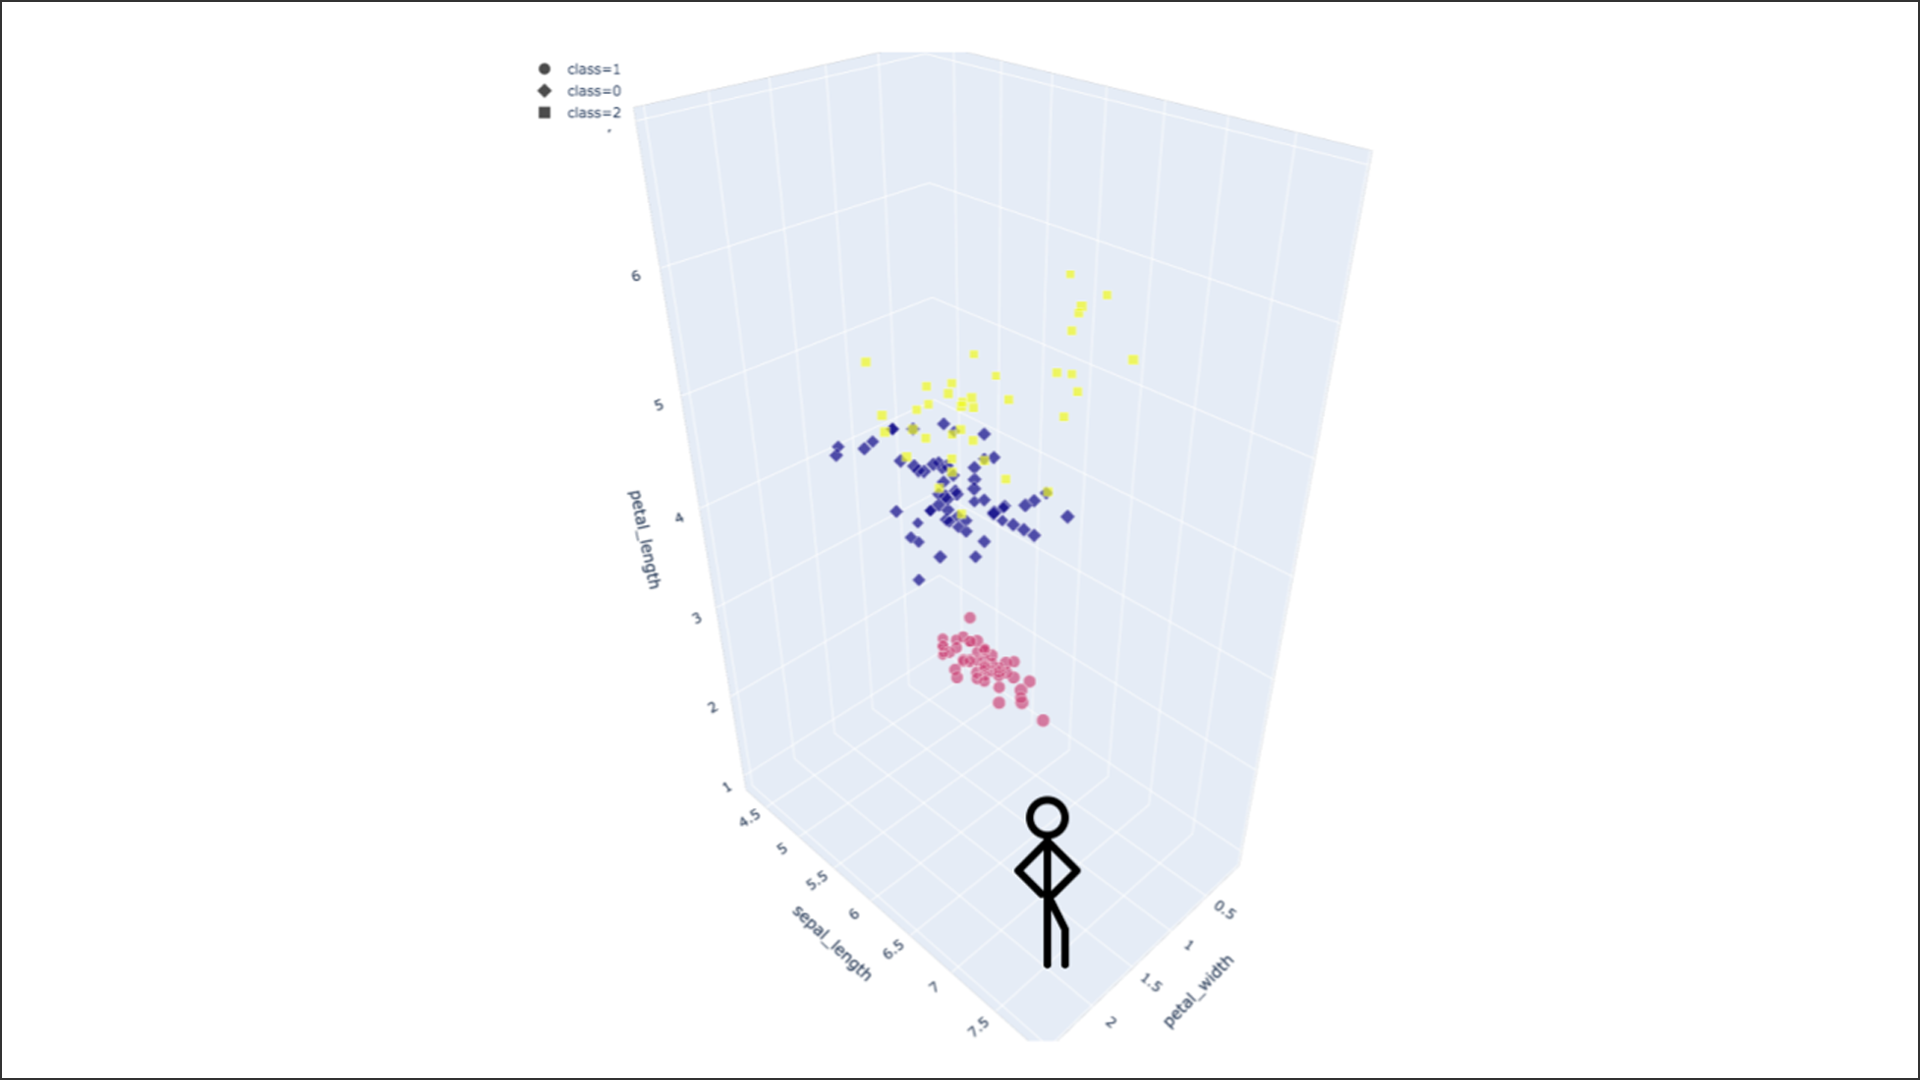

## K-means Algorithm

#### Clustering is exactly what we want from unsupervised learning, but exactly how can we determine the clusters? 

K-means is an unsupervised learning algorithm used to identify and solve clustering issues.

K represents how many clusters there will be. These clusters are then determined by the means of all the points that will belong to the cluster.

The K-means algorithm groups the data into K clusters, where belonging to a cluster is based on some similarity or distance measure to a centroid.

A centroid is a data point that is the arithmetic mean position of all the points on a cluster: 
The centroid is found by taking the mean of all the x values in a cluster, and the mean of all the y values in a cluster.

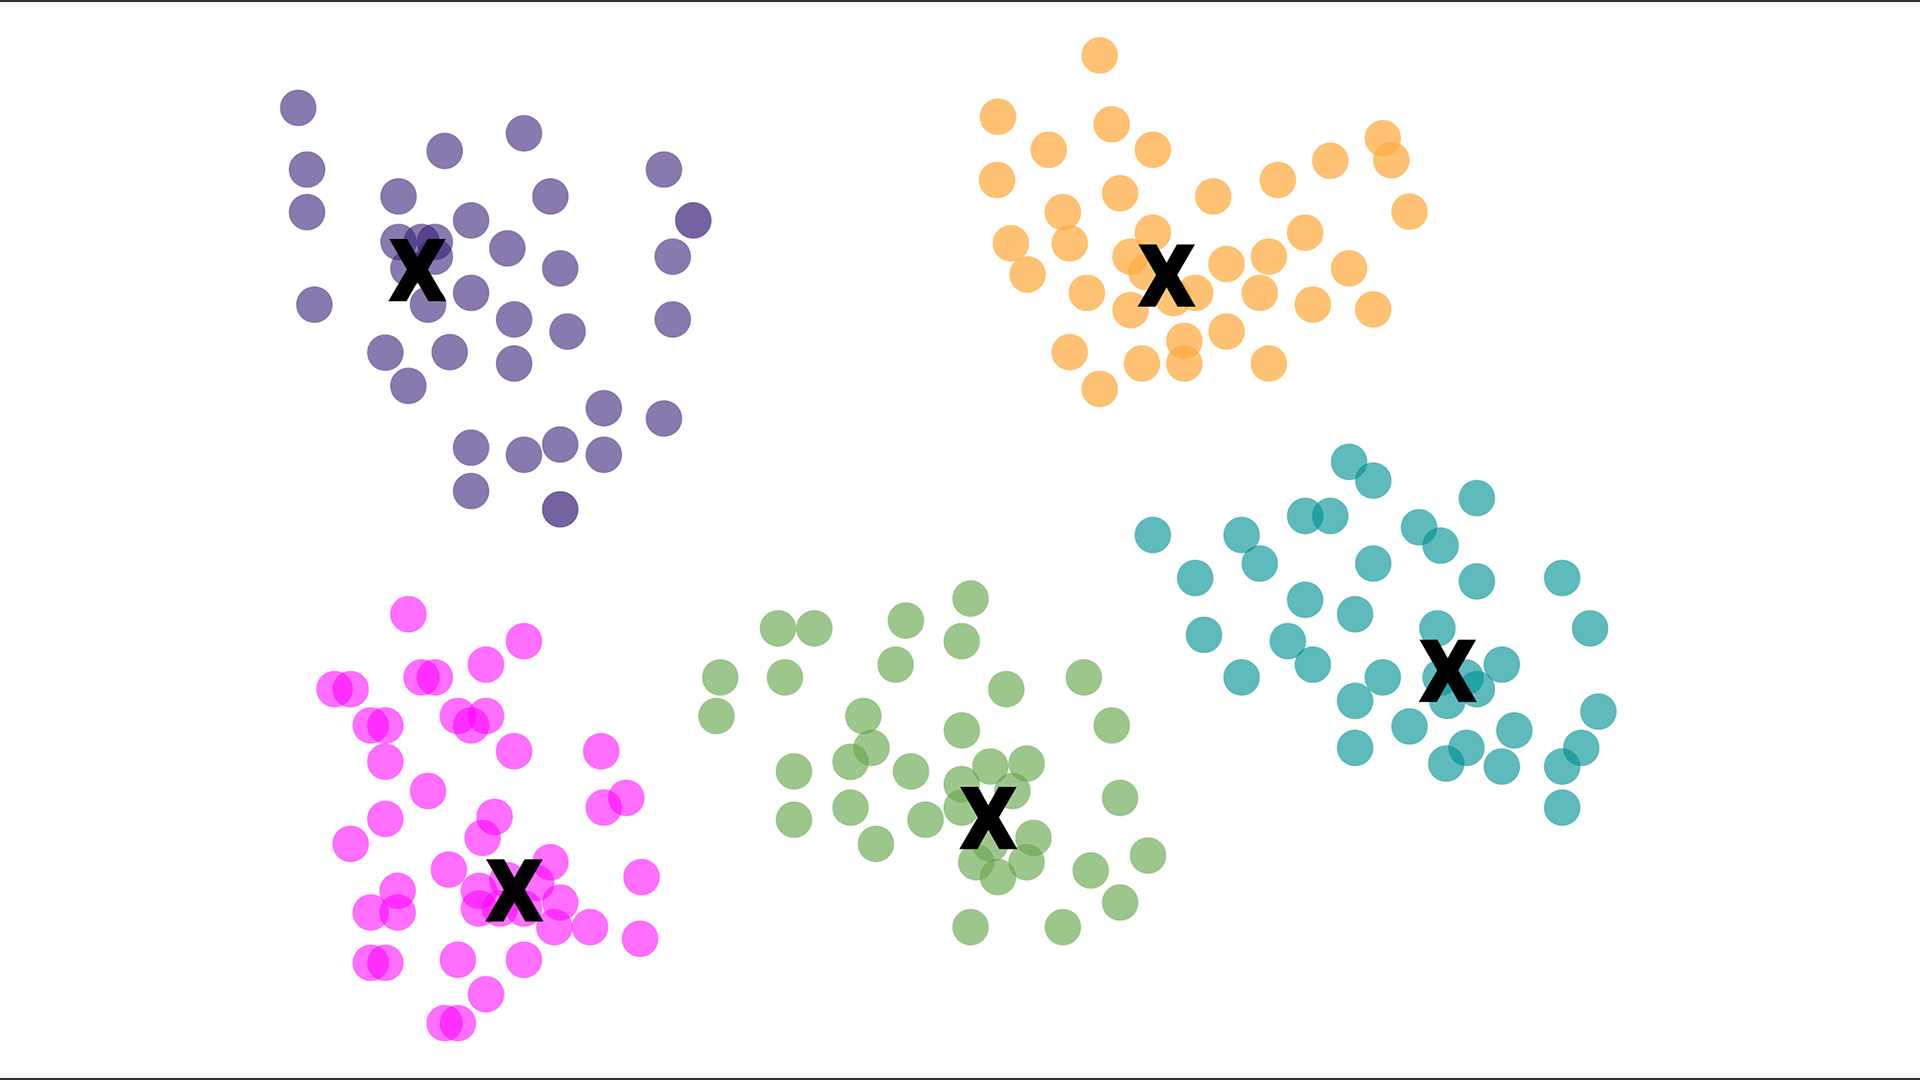

In [1]:
# Import dependencies
import pandas as pd
import plotly.express as px
import hvplot.pandas
from sklearn.cluster import KMeans

In [19]:
# Loading Data
file_path = "new_iris_data1.csv"
df_iris = pd.read_csv(file_path)
df_iris.head()

sepal_length  petal_length  sepal_width  petal_width
0           5.1           1.4          3.5          0.2
1           4.9           1.4          3.0          0.2
2           4.7           1.3          3.2          0.2
3           4.6           1.5          3.1          0.2
4           5.0           1.4          3.6          0.2

### Initialize the K Starting Centroids

After data has been loaded, create an instance of the K-means algorithm and initialize it with the desired number of clusters (K). We’re working with data that has a set number of clusters. Often, you won’t know the number that you should work with, so you’ll have to use the trial-and-error method to determine it. 

In [10]:
# Initializing model with K = 3 (since we already know there are three classess of iris plants)
model = KMeans(n_clusters=3, random_state=5)
model

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=5, tol=0.0001, verbose=0)

### Data Points Assigned to Nearest Centroid

Once the model instance is created, our next step is to fit the model with the unlabeled data. This step should be familiar with fitting data from supervised learning; however, you’ll notice that data is not being split into training and test data. When the model is being trained (fit the data), the K-means algorithm will iteratively look for the best centroid for each of the K clusters:

In [11]:
# Fitting model
model.fit(df_iris)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=5, tol=0.0001, verbose=0)

### Group Data Points

After the model is fit, the corresponding cluster for every iris plant in the dataset can be found using the predict() method:

Important
As you can see, there were three subclasses that were labeled 0, 1, and 2. These are not the means for the centroids, but rather just the label names. The K-means algorithm is able to identify how many clusters are in the data and label them with numbers.

In [14]:
# Get predictions
predictions = model.predict(df_iris)
print(predictions)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 2 2 2 2 0 2 2 2 2
 2 2 0 0 2 2 2 2 0 2 0 2 0 2 2 0 0 2 2 2 2 2 0 2 2 2 2 0 2 2 2 0 2 2 2 0 2
 2 0]


In [15]:
# After we have the class for each data point, we can add a new column to the DataFrame with the predicted classes:
# Add a new class column to df_iris
df_iris["class"] = model.labels_
df_iris.head()

sepal_length  petal_length  sepal_width  petal_width  class
0           5.1           1.4          3.5          0.2      1
1           4.9           1.4          3.0          0.2      1
2           4.7           1.3          3.2          0.2      1
3           4.6           1.5          3.1          0.2      1
4           5.0           1.4          3.6          0.2      1

### Visualize the Results

Visualizing the clusters helps to graphically understand how they are arranged. In this case, we actually have too many features to represent visually, but we can select a few of them and plot the clusters. 
For our visualizations, we’ll use hvPlot, a graphing library that allows deeper exploration of the data.

First, look at the data with two features. The hvPlot library makes it easy to create scatter plots directly from a Pandas DataFrame. After our DataFrame has been loaded in from the CSV, we can create a scatter plot with one line of code. We pass in the arguments for the x- and y-axis and color them by class:

In [16]:
# Plotting the clusters with the two features
df_iris.hvplot.scatter(x="sepal_length", y="sepal_width", by="class")

:NdOverlay   [class]
   :Scatter   [sepal_length]   (sepal_width)

In the results, it appears some of the clusters are overlapping and not quite forming three distincts groups as we had hoped. Before jumping to the conclusion that our model didn’t do what we wanted, remember that we are taking multiple data points (petal_width, sepal_length, and petal_length). Since this plot is on a 2D graph, all three features can’t be properly displayed.

Plotting in 3D takes a few more arguments and will allow us to visualize more data points. We now have an x-, y-, and z-axis that will take all three of our features as coordinates. We pass in the class data points to determine color and symbol of the points. Size of the points will be determined by sepal_width.

Finally, we’ll update the figure by passing a dictionary with x, y, and z:

In [18]:
# Plotting the clusters with three features
fig = px.scatter_3d(df_iris, x="petal_width", y="sepal_length", z="petal_length", color="class", symbol="class", size="sepal_width", width=800,)
fig.update_layout(legend=dict(x=0, y=1))
fig.show()

Here, you can see that our model did do what we wanted! There are now three distinct groups that correspond to the three clusters that we expect the model to break the data into.